# **Naive Bayes**

```
Alumno : Pfoccori Quispe Alex Harvey
Codigo: 193837
Proposito : Naive Bayes en la clasificacion de genero segun la voz
```

## **1. Librerias a utilizar**

In [50]:
# Librerias generales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree

# Librerias para metricas
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Librerias para Naive Bayes
from sklearn.naive_bayes import GaussianNB

## **2. Leer datos**

In [51]:
datos = pd.read_csv('voz.csv', sep=',')
datos.head(10)

,frecuencia_media,sd,mediana,Q1,Q3,IQR,skew,kurt,sp.ent,sfm,...,centroide,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


## **3. Descripcion de datos**

In [52]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   frecuencia_media  3168 non-null   float64
 1   sd                3168 non-null   float64
 2   mediana           3168 non-null   float64
 3   Q1                3168 non-null   float64
 4   Q3                3168 non-null   float64
 5   IQR               3168 non-null   float64
 6   skew              3168 non-null   float64
 7   kurt              3168 non-null   float64
 8   sp.ent            3168 non-null   float64
 9   sfm               3168 non-null   float64
 10  moda              3168 non-null   float64
 11  centroide         3168 non-null   float64
 12  meanfun           3168 non-null   float64
 13  minfun            3168 non-null   float64
 14  maxfun            3168 non-null   float64
 15  meandom           3168 non-null   float64
 16  mindom            3168 non-null   float64


In [53]:
# Estadisticos basicos por atributos
print(datos.describe().transpose())

                   count       mean         std       min       25%       50%  \
frecuencia_media  3168.0   0.180907    0.029918  0.039363  0.163662  0.184838   
sd                3168.0   0.057126    0.016652  0.018363  0.041954  0.059155   
mediana           3168.0   0.185621    0.036360  0.010975  0.169593  0.190032   
Q1                3168.0   0.140456    0.048680  0.000229  0.111087  0.140286   
Q3                3168.0   0.224765    0.023639  0.042946  0.208747  0.225684   
IQR               3168.0   0.084309    0.042783  0.014558  0.042560  0.094280   
skew              3168.0   3.140168    4.240529  0.141735  1.649569  2.197101   
kurt              3168.0  36.568461  134.928661  2.068455  5.669547  8.318463   
sp.ent            3168.0   0.895127    0.044980  0.738651  0.861811  0.901767   
sfm               3168.0   0.408216    0.177521  0.036876  0.258041  0.396335   
moda              3168.0   0.165282    0.077203  0.000000  0.118016  0.186599   
centroide         3168.0   0

## **4. Histograma**

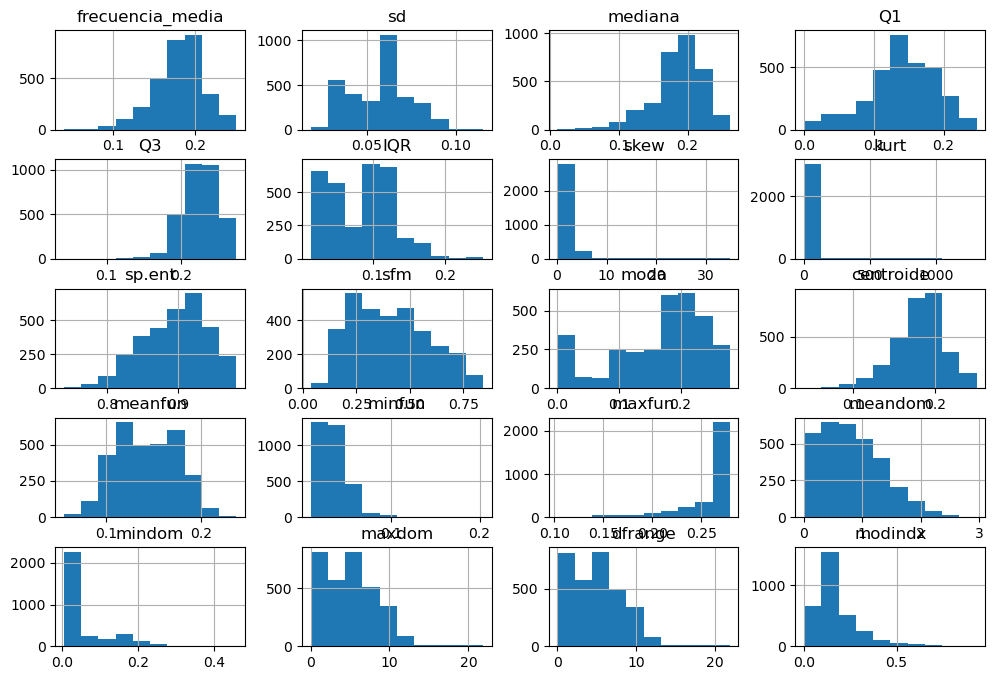

In [54]:
datos.hist(figsize=(12,8))
plt.show()

## **5. Distribucion de clases**

In [55]:
# Numero de registros por especie de iris
print(datos.groupby('genero').size())

genero
female    1584
male      1584
dtype: int64


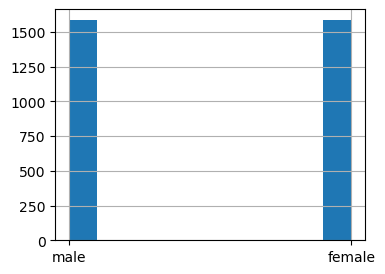

In [56]:
plt.figure(figsize=(4,3))
datos['genero'].hist()
plt.show()

## **6. Separacion de datos, para entrenamiento y test**

In [57]:
x = datos.drop(['genero'], axis=1)
y = datos['genero']

# Separa datos en entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=27, train_size=0.7)
x_train.head()

,frecuencia_media,sd,mediana,Q1,Q3,IQR,skew,kurt,sp.ent,sfm,moda,centroide,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
767,0.167021,0.057011,0.187109,0.106603,0.207457,0.100853,2.312101,9.115040,0.908148,0.420416,0.201264,0.167021,0.100181,0.017448,0.275862,0.352539,0.007812,2.367188,2.359375,0.170199
2086,0.187650,0.032121,0.184712,0.175330,0.208461,0.033131,3.257211,15.619184,0.826433,0.222245,0.179435,0.187650,0.173670,0.025723,0.258065,0.668294,0.164062,6.703125,6.539062,0.108514
617,0.170625,0.072667,0.185302,0.116709,0.231371,0.114662,1.408412,6.306749,0.963756,0.717781,0.231115,0.170625,0.123096,0.066116,0.275862,0.818257,0.007812,5.062500,5.054688,0.184653
1132,0.194644,0.059432,0.217778,0.133086,0.247160,0.114074,1.446529,4.566551,0.890735,0.315710,0.248313,0.194644,0.117966,0.049180,0.252632,1.089489,0.023438,8.320312,8.296875,0.102072
1823,0.163067,0.062227,0.176203,0.161345,0.195874,0.034529,3.030760,13.039851,0.899023,0.484542,0.172018,0.163067,0.167055,0.029304,0.250000,0.847656,0.007812,6.484375,6.476562,0.184146


## **7. Entrenamiento de Naive Bayes**

In [58]:
# Crear objeto NaiveBayes
NaiveBayes = GaussianNB()

# Entrenamiento
NaiveBayes.fit(x_train, y_train)

GaussianNB()

In [59]:
# Exactitud del entrenamiento
NaiveBayes.score(x_test, y_test)

0.9032597266035752

## **8. Prueba(test) del modelo**

In [60]:
# Datos de prueba
x_test.head()

,frecuencia_media,sd,mediana,Q1,Q3,IQR,skew,kurt,sp.ent,sfm,moda,centroide,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
2565,0.233168,0.039003,0.244814,0.207150,0.261168,0.054018,2.007895,6.808254,0.839756,0.202336,0.257204,0.233168,0.180119,0.047856,0.275862,1.614462,0.210938,10.101562,9.890625,0.165269
522,0.132710,0.081996,0.122856,0.082878,0.216035,0.133158,26.935019,890.845398,0.912579,0.586010,0.000000,0.132710,0.091647,0.017410,0.262295,0.007812,0.007812,0.007812,0.000000,0.000000
2096,0.200158,0.037003,0.202632,0.185000,0.224211,0.039211,2.425073,9.687733,0.861045,0.256367,0.200263,0.200158,0.174239,0.019488,0.258065,0.608796,0.109375,6.437500,6.328125,0.136420
1804,0.174035,0.035058,0.168804,0.160319,0.184657,0.024338,4.072936,21.794666,0.826866,0.246242,0.160319,0.174035,0.153981,0.029412,0.210526,0.504136,0.148438,5.765625,5.617188,0.087116
275,0.151401,0.075805,0.154007,0.096461,0.215830,0.119369,1.394139,5.701462,0.964540,0.729505,0.017112,0.151401,0.104354,0.030246,0.275862,0.652902,0.007812,4.171875,4.164062,0.221388


In [61]:
# Prediccion con los datos de test
pred = NaiveBayes.predict(x_test)
print(pred)

['female' 'male' 'female' 'female' 'male' 'male' 'male' 'female' 'male'
 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'male'
 'male' 'male' 'female' 'male' 'female' 'male' 'female' 'female' 'male'
 'male' 'female' 'female' 'female' 'female' 'female' 'female' 'male'
 'male' 'female' 'male' 'female' 'male' 'male' 'male' 'female' 'male'
 'female' 'male' 'female' 'female' 'female' 'male' 'female' 'male' 'male'
 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'male' 'male'
 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'male' 'female'
 'female' 'female' 'female' 'female' 'female' 'male' 'male' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'female'
 'male' 'female' 'female' 'female' 'male' 'female' 'male' 'female' 'male'
 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'male'
 'male' 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'female'
 'female' 'male' 'female' 'female' 'female' 'male' 'male' 'female' 

## **9. Matriz de confusion y metricas**

In [62]:
# Dataframe con las etiqueta reales (y_test) y las generadas pro el modelo (pred)

# Crear una lista de tuplas con los valores de y_test y pred
resultados = list(zip(y_test, pred))

# Crear el Dataframe a partir de la lista de tuplas
df = pd.DataFrame(resultados, columns=['y_test', 'pred'])
df

,y_test,pred
0,female,female
1,male,male
2,female,female
3,female,female
4,male,male
...,...,...
946,male,male
947,male,male
948,male,female
949,male,male


In [63]:
# Generar la matriz de confusion
MatrizConfusion = confusion_matrix(y_test, pred)
Exactitud = metrics.accuracy_score(y_test, pred)

print('Matriz de Confusion')
print(MatrizConfusion)
print('Exactitud = ', Exactitud)

Matriz de Confusion
[[413  52]
 [ 40 446]]
Exactitud =  0.9032597266035752


## **10. Prediccion**

In [64]:
x_train.columns

Index(['frecuencia_media', 'sd', 'mediana', 'Q1', 'Q3', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'moda', 'centroide', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')

In [65]:
# Crear un data set con un nuevo registro; cuidando la estructura del data set de entrenamiento
nuevo = pd.DataFrame(data=[[0.23, 0.040, 0.24, 0.21, 0.27, 0.05, 2.00, 6.80, 0.80, 0.20, 0.25, 0.23, 0.18, 0.04, 0.27, 1.60, 0.21, 10.10, 9.80, 0.16]],
                     columns=['frecuencia_media', 'sd', 'mediana', 'Q1', 'Q3', 'IQR', 'skew', 'kurt',
                            'sp.ent', 'sfm', 'moda', 'centroide', 'meanfun', 'minfun', 'maxfun',
                            'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'])

pred = NaiveBayes.predict(nuevo)
pred

array(['female'], dtype='<U6')

In [66]:
# Prediccion directa
pred = NaiveBayes.predict([[0.23, 0.040, 0.24, 0.21, 0.27, 0.05, 2.00, 6.80, 0.80, 0.20, 0.25, 0.23, 0.18, 0.04, 0.27, 1.60, 0.21, 10.10, 9.80, 0.16]])
pred

c:\Users\HARVEY\anaconda3\envs\machine-learning\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['female'], dtype='<U6')